In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

### 1.	Import required libraries and read the dataset. (2)
### 2.	Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)
### 3.	Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [123]:
df=pd.read_csv('/Users/moni/Documents/loan_prediction/dataset.csv')
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [124]:
df.shape

(614, 13)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
loan_id              614 non-null object
gender               601 non-null object
married              611 non-null object
dependents           599 non-null object
education            614 non-null object
self_employed        582 non-null object
applicantincome      614 non-null int64
coapplicantincome    614 non-null float64
loanamount           592 non-null float64
loan_amount_term     600 non-null float64
credit_history       564 non-null float64
property_area        614 non-null object
loan_status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [126]:
df.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [127]:
df['property_area'].unique()

array(['urban', 'rural', 'semiurban'], dtype=object)

In [128]:
df['education'].unique()

array(['graduate', 'not graduate'], dtype=object)

In [129]:
df['loan_status'].unique()

array(['y', 'n'], dtype=object)

In [130]:
df=df.replace('', np.nan) 

In [131]:
# missing values check
df.isnull().sum()/len(df)*100


loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [132]:
len(df[df.duplicated()])


0

In [133]:
# missing value treatment
#majority of credit history has value 1 as per df.describe()
df["credit_history"].fillna(1, inplace=True)

In [134]:
#loanamount and loan_amount_term can be replaced with median
df["loanamount"].fillna((df["loanamount"].median()), inplace=True)
df["loan_amount_term"].fillna((df["loan_amount_term"].median()), inplace=True)

In [135]:
# categoricals gender,dependents,self_employed,married can be replaced with mode values
df["gender"].fillna((df["gender"].mode()[0]), inplace=True)
df["dependents"].fillna((df["dependents"].mode()[0]), inplace=True)
df["self_employed"].fillna((df["self_employed"].mode()[0]), inplace=True)
df["married"].fillna((df["married"].mode()[0]), inplace=True)

In [136]:
# missing values check
df.isnull().sum()/len(df)*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [137]:
## loan_id is an identifier but is redundant for model building
df=df.drop('loan_id',axis=1 )


## 4.	Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

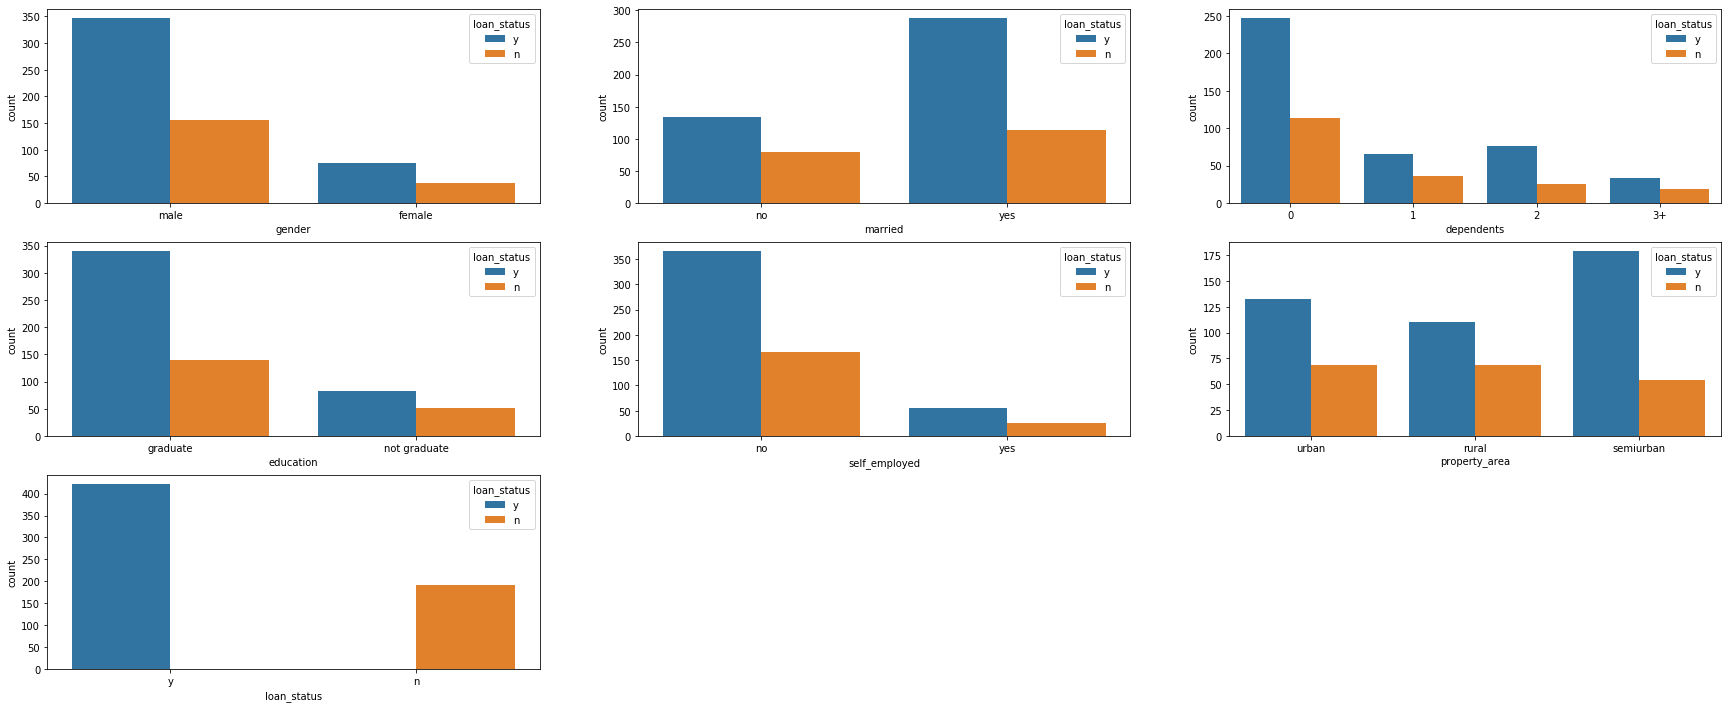

In [138]:
categorical_features=df.select_dtypes(include=[np.object])
#univariate analysis of churn
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df)
    i+=1

## Observations
## More males as compared to females have their loan approved
## More married people have their loans approved
## Most people with no dependents have their loans approved
## Most graduates have their loans approved
## Most Non self employed have their loans approved
## Most people in semi urban have their loans approved

## 5.	Encode the categorical data. (2)

In [139]:
# select multiple category datatype variables for label encoding
label_type_variables=[i for i in df[['dependents','property_area']] ]
le=LabelEncoder()
def encoder(df):
    for i in label_type_variables:
        q=le.fit_transform(df[i].astype('str'))
        df[i]=q
        df[i]=df[i].astype('int')
encoder(df)
df.head(5)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0.0,128.0,360.0,1.0,2,y
1,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,0,n
2,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,2,y
3,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,2,y
4,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,2,y


In [140]:
# one hot encoding the remaining categoricals
df=pd.get_dummies(df,drop_first=True)
df.head(5)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,gender_male,married_yes,education_not graduate,self_employed_yes,loan_status_y
0,0,5849,0.0,128.0,360.0,1.0,2,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,2,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0,1


In [141]:
df.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'gender_male',
       'married_yes', 'education_not graduate', 'self_employed_yes',
       'loan_status_y'],
      dtype='object')

In [142]:
#renaming education_not graduate
df.rename(columns = {"education_not graduate":'education_notGrad'}, inplace = True)

In [143]:
df.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'gender_male',
       'married_yes', 'education_notGrad', 'self_employed_yes',
       'loan_status_y'],
      dtype='object')

## 6.	Separate the target and independent features and split the data into train and test. 


In [144]:
X=df.drop('loan_status_y',axis=1)
y=df['loan_status_y']

In [145]:
y.value_counts()

1    422
0    192
Name: loan_status_y, dtype: int64

In [146]:
# split 70:30

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [147]:
X_train.head(2)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,gender_male,married_yes,education_notGrad,self_employed_yes
559,0,4180,2306.0,182.0,360.0,1.0,1,0,1,0,0
244,0,3406,4417.0,123.0,360.0,1.0,1,1,1,1,0


In [148]:
X_test.head(2)

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,gender_male,married_yes,education_notGrad,self_employed_yes
168,0,2237,0.0,63.0,480.0,0.0,1,1,0,0,0
542,1,3652,0.0,95.0,360.0,1.0,1,0,0,0,0


## 7.	Build any classification model to predict the loan status of the customer and save your model using pickle. 

In [149]:
# 11.function for model fit
def fit_n_print(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    return accuracy

In [150]:
lr=LogisticRegression()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
gb=GradientBoostingClassifier()

estimators=[('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc=StackingClassifier(estimators=estimators, final_estimator=rf)

In [151]:
result=pd.DataFrame(columns=['Accuracy'])
for model,model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],['Logistic Regression','Naive Bayes','KNN','Decision tree','Random Forest','Ada Boost','Gradient Boost','Stacking']):
    result.loc[model_name]=fit_n_print(model,X_train,X_test,y_train,y_test)

In [152]:
result

,Accuracy
Logistic Regression,0.794595
Naive Bayes,0.794595
KNN,0.594595
Decision tree,0.729730
Random Forest,0.789189
Ada Boost,0.789189
Gradient Boost,0.816216
Stacking,0.783784


## Conclusion
## Gradient Boost gives the highest accuracy 81.62% amongst all the classifier models ## and hence can be possibly used as the 
## chosen classifier for predicting loan approval status

In [153]:
## let us also check f1 score for logistic regression

In [155]:
from sklearn.metrics import  f1_score

In [156]:
model=gb.fit(X_train,y_train)
pred=model.predict(X_test)
f1_score=f1_score(y_test,pred)

In [157]:
f1_score

0.8759124087591241

In [158]:
## pickle the model
filename = '/Users/moni/Documents/loan_prediction/loan_approval_predictor_final.pkl'
pickle.dump(model, open(filename, 'wb'))

In [159]:
pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [160]:
X_test.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'gender_male',
       'married_yes', 'education_notGrad', 'self_employed_yes'],
      dtype='object')

In [161]:
X_train.columns

Index(['dependents', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'gender_male',
       'married_yes', 'education_notGrad', 'self_employed_yes'],
      dtype='object')